In [881]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [844]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [845]:
# Pull main data set
df = pd.read_csv('nfl_top_100.csv')
df.head(5)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,...,Passing_Int,Rushing_Att,Rushing_Yds,Rushing_TD,Rec,Rec_Yds,Rec_TD,Solo,Sacks,Def_Int
0,2019,1,DT,Aaron Donald,LAR,16.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,12.5,0.0
1,2019,2,QB,Drew Brees,NOR,11.0,11.0,281.0,378.0,2979.0,...,4.0,9.0,-4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,3,DE,Khalil Mack,CHI,16.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,8.5,0.0
3,2019,4,QB,Patrick Mahomes,KAN,14.0,14.0,319.0,484.0,4031.0,...,5.0,43.0,218.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,5,RB,Todd Gurley,LAR,15.0,15.0,0.0,0.0,0.0,...,0.0,223.0,857.0,12.0,31.0,207.0,2.0,0.0,0.0,0.0


In [846]:
# Create sub data frame for QB's from all years
qb_df = df[(df['Pos'] == 'QB')]
qb_df.head(17)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,...,Passing_Int,Rushing_Att,Rushing_Yds,Rushing_TD,Rec,Rec_Yds,Rec_TD,Solo,Sacks,Def_Int
1,2019,2,QB,Drew Brees,NOR,11.0,11.0,281.0,378.0,2979.0,...,4.0,9.0,-4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,4,QB,Patrick Mahomes,KAN,14.0,14.0,319.0,484.0,4031.0,...,5.0,43.0,218.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019,6,QB,Tom Brady,NWE,16.0,16.0,373.0,613.0,4057.0,...,8.0,26.0,34.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2019,8,QB,Aaron Rodgers,GNB,16.0,16.0,353.0,569.0,4002.0,...,4.0,46.0,183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2019,17,QB,Philip Rivers,LAC,16.0,16.0,390.0,591.0,4615.0,...,20.0,12.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2019,20,QB,Andrew Luck,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2019,25,QB,Russell Wilson,SEA,16.0,16.0,341.0,516.0,4110.0,...,5.0,75.0,342.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
31,2019,32,QB,Jared Goff,LAR,16.0,16.0,394.0,626.0,4638.0,...,16.0,33.0,40.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
43,2019,44,QB,Ben Roethlisberger,PIT,2.0,2.0,35.0,62.0,351.0,...,1.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,2019,50,QB,Baker Mayfield,CLE,16.0,16.0,317.0,534.0,3827.0,...,21.0,28.0,141.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [847]:
qb_df.columns

Index(['Year', 'Rank', 'Pos', 'Player', 'Team', 'Games_played',
       'Games_started', 'Cmp', 'Att', 'Passing_Yards', 'Pass_TD',
       'Passing_Int', 'Rushing_Att', 'Rushing_Yds', 'Rushing_TD', 'Rec',
       'Rec_Yds', 'Rec_TD', 'Solo', 'Sacks', 'Def_Int'],
      dtype='object')

In [848]:
# Drop columns that are not related to QB's
qb_df.drop(labels = ['Rushing_Att', 'Rushing_Yds', 'Rushing_TD', 'Rec',
       'Rec_Yds', 'Rec_TD', 'Solo', 'Sacks', 'Def_Int'], axis='columns', inplace=True)

In [849]:
qb_df.columns

Index(['Year', 'Rank', 'Pos', 'Player', 'Team', 'Games_played',
       'Games_started', 'Cmp', 'Att', 'Passing_Yards', 'Pass_TD',
       'Passing_Int'],
      dtype='object')

In [850]:
# Create sub df's by year
qb_2019_df = qb_df[(qb_df['Year'] == 2019)]
qb_2018_df = qb_df[(qb_df['Year'] == 2018)]
qb_2017_df = qb_df[(qb_df['Year'] == 2017)]
qb_2016_df = qb_df[(qb_df['Year'] == 2016)]
qb_2015_df = qb_df[(qb_df['Year'] == 2015)]
qb_2014_df = qb_df[(qb_df['Year'] == 2014)]
qb_2013_df = qb_df[(qb_df['Year'] == 2013)]
qb_2012_df = qb_df[(qb_df['Year'] == 2012)]
qb_2011_df = qb_df[(qb_df['Year'] == 2011)]

In [851]:
qb_2012_df.head(15)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int
699,2012,1,QB,Aaron Rodgers,GNB,16.0,16.0,371.0,552.0,4295.0,39.0,8.0
700,2012,2,QB,Drew Brees,NOR,16.0,16.0,422.0,670.0,5177.0,43.0,19.0
702,2012,4,QB,Tom Brady,NWE,16.0,16.0,401.0,637.0,4827.0,34.0,8.0
728,2012,30,QB,Ben Roethlisberger,PIT,13.0,13.0,284.0,449.0,3265.0,26.0,8.0
729,2012,31,QB,Eli Manning,NYG,16.0,16.0,321.0,536.0,3948.0,26.0,15.0
738,2012,40,QB,Cam Newton,CAR,16.0,16.0,280.0,485.0,3869.0,19.0,12.0
739,2012,41,QB,Matthew Stafford,DET,16.0,16.0,435.0,727.0,4967.0,20.0,17.0
748,2012,50,QB,Peyton Manning,DEN,16.0,16.0,400.0,583.0,4659.0,37.0,11.0
759,2012,61,QB,Philip Rivers,SDG,16.0,16.0,338.0,527.0,3606.0,26.0,15.0
768,2012,70,QB,Michael Vick,PHI,10.0,10.0,204.0,351.0,2362.0,12.0,10.0


In [852]:
# Add .rank() columns for Passing Yards, Comp%, PassTD, and Int for each year

# 2019
qb_2019_df.insert(12, column="PassingYards_Rank", value = qb_2019_df['Passing_Yards'].rank(pct=True))
qb_2019_df.insert(13, column="Comp%_Rank", value = qb_2019_df['Cmp'].rank(pct=True))
qb_2019_df.insert(14, column="PassTD_Rank", value = qb_2019_df['Pass_TD'].rank(pct=True))
qb_2019_df.insert(15, column="Int_Rank", value = 1 - qb_2019_df['Passing_Int'].rank(pct=True))

In [853]:
# Make sure the columns updated before adding the rest of the years
qb_2019_df.columns

Index(['Year', 'Rank', 'Pos', 'Player', 'Team', 'Games_played',
       'Games_started', 'Cmp', 'Att', 'Passing_Yards', 'Pass_TD',
       'Passing_Int', 'PassingYards_Rank', 'Comp%_Rank', 'PassTD_Rank',
       'Int_Rank'],
      dtype='object')

In [854]:
# Add the rest of the years

# 2018
qb_2018_df.insert(12, column="PassingYards_Rank", value = qb_2018_df['Passing_Yards'].rank(pct=True))
qb_2018_df.insert(13, column="Comp%_Rank", value = qb_2018_df['Cmp'].rank(pct=True))
qb_2018_df.insert(14, column="PassTD_Rank", value = qb_2018_df['Pass_TD'].rank(pct=True))
qb_2018_df.insert(15, column="Int_Rank", value = 1 - qb_2018_df['Passing_Int'].rank(pct=True))

# 2017
qb_2017_df.insert(12, column="PassingYards_Rank", value = qb_2017_df['Passing_Yards'].rank(pct=True))
qb_2017_df.insert(13, column="Comp%_Rank", value = qb_2017_df['Cmp'].rank(pct=True))
qb_2017_df.insert(14, column="PassTD_Rank", value = qb_2017_df['Pass_TD'].rank(pct=True))
qb_2017_df.insert(15, column="Int_Rank", value = 1 - qb_2017_df['Passing_Int'].rank(pct=True))

# 2016
qb_2016_df.insert(12, column="PassingYards_Rank", value = qb_2016_df['Passing_Yards'].rank(pct=True))
qb_2016_df.insert(13, column="Comp%_Rank", value = qb_2016_df['Cmp'].rank(pct=True))
qb_2016_df.insert(14, column="PassTD_Rank", value = qb_2016_df['Pass_TD'].rank(pct=True))
qb_2016_df.insert(15, column="Int_Rank", value = 1 - qb_2016_df['Passing_Int'].rank(pct=True))

# 2015
qb_2015_df.insert(12, column="PassingYards_Rank", value = qb_2015_df['Passing_Yards'].rank(pct=True))
qb_2015_df.insert(13, column="Comp%_Rank", value = qb_2015_df['Cmp'].rank(pct=True))
qb_2015_df.insert(14, column="PassTD_Rank", value = qb_2015_df['Pass_TD'].rank(pct=True))
qb_2015_df.insert(15, column="Int_Rank", value = 1 - qb_2015_df['Passing_Int'].rank(pct=True))

# 2014
qb_2014_df.insert(12, column="PassingYards_Rank", value = qb_2014_df['Passing_Yards'].rank(pct=True))
qb_2014_df.insert(13, column="Comp%_Rank", value = qb_2014_df['Cmp'].rank(pct=True))
qb_2014_df.insert(14, column="PassTD_Rank", value = qb_2014_df['Pass_TD'].rank(pct=True))
qb_2014_df.insert(15, column="Int_Rank", value = 1 - qb_2014_df['Passing_Int'].rank(pct=True))

# 2013
qb_2013_df.insert(12, column="PassingYards_Rank", value = qb_2013_df['Passing_Yards'].rank(pct=True))
qb_2013_df.insert(13, column="Comp%_Rank", value = qb_2013_df['Cmp'].rank(pct=True))
qb_2013_df.insert(14, column="PassTD_Rank", value = qb_2013_df['Pass_TD'].rank(pct=True))
qb_2013_df.insert(15, column="Int_Rank", value = 1 - qb_2013_df['Passing_Int'].rank(pct=True))

# 2012
qb_2012_df.insert(12, column="PassingYards_Rank", value = qb_2012_df['Passing_Yards'].rank(pct=True))
qb_2012_df.insert(13, column="Comp%_Rank", value = qb_2012_df['Cmp'].rank(pct=True))
qb_2012_df.insert(14, column="PassTD_Rank", value = qb_2012_df['Pass_TD'].rank(pct=True))
qb_2012_df.insert(15, column="Int_Rank", value = 1 - qb_2012_df['Passing_Int'].rank(pct=True))

# 2011
qb_2011_df.insert(12, column="PassingYards_Rank", value = qb_2011_df['Passing_Yards'].rank(pct=True))
qb_2011_df.insert(13, column="Comp%_Rank", value = qb_2011_df['Cmp'].rank(pct=True))
qb_2011_df.insert(14, column="PassTD_Rank", value = qb_2011_df['Pass_TD'].rank(pct=True))
qb_2011_df.insert(15, column="Int_Rank", value = 1 - qb_2011_df['Passing_Int'].rank(pct=True))

In [855]:
# Check all years to make sure columns were created and show top 3 QB's
qb_2019_df.head(3)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int,PassingYards_Rank,Comp%_Rank,PassTD_Rank,Int_Rank
1,2019,2,QB,Drew Brees,NOR,11.0,11.0,281.0,378.0,2979.0,27.0,4.0,0.214286,0.214286,0.892857,0.750000
3,2019,4,QB,Patrick Mahomes,KAN,14.0,14.0,319.0,484.0,4031.0,26.0,5.0,0.571429,0.428571,0.642857,0.607143
5,2019,6,QB,Tom Brady,NWE,16.0,16.0,373.0,613.0,4057.0,24.0,8.0,0.714286,0.714286,0.428571,0.357143


In [856]:
qb_2018_df.head(3)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int,PassingYards_Rank,Comp%_Rank,PassTD_Rank,Int_Rank
100,2018,1,QB,Tom Brady,NWE,16.0,16.0,375.0,570.0,4355.0,29.0,11.0,0.7500,0.75000,0.56250,0.34375
102,2018,3,QB,Carson Wentz,PHI,11.0,11.0,279.0,401.0,3074.0,21.0,7.0,0.1250,0.12500,0.28125,0.68750
107,2018,8,QB,Drew Brees,NOR,15.0,15.0,364.0,489.0,3992.0,32.0,5.0,0.4375,0.46875,0.75000,0.81250


In [857]:
qb_2017_df.head(3)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int,PassingYards_Rank,Comp%_Rank,PassTD_Rank,Int_Rank
200,2017,1,QB,Tom Brady,NWE,16.0,16.0,385.0,581.0,4577.0,32.0,8.0,1.000000,0.933333,0.933333,0.766667
205,2017,6,QB,Aaron Rodgers,GNB,7.0,7.0,154.0,238.0,1675.0,16.0,6.0,0.066667,0.066667,0.133333,0.866667
209,2017,10,QB,Matt Ryan,ATL,16.0,16.0,342.0,529.0,4095.0,20.0,12.0,0.666667,0.600000,0.266667,0.400000


In [858]:
qb_2016_df.head(3)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int,PassingYards_Rank,Comp%_Rank,PassTD_Rank,Int_Rank
300,2016,1,QB,Cam Newton,CAR,15.0,14.0,270.0,510.0,3509.0,19.0,14.0,0.133333,0.066667,0.200000,0.300000
301,2016,2,QB,Tom Brady,NWE,12.0,12.0,291.0,432.0,3554.0,28.0,2.0,0.200000,0.133333,0.633333,0.933333
305,2016,6,QB,Aaron Rodgers,GNB,16.0,16.0,401.0,610.0,4428.0,40.0,7.0,0.866667,0.866667,1.000000,0.800000


In [859]:
qb_2015_df.head(3)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int,PassingYards_Rank,Comp%_Rank,PassTD_Rank,Int_Rank
401,2015,2,QB,Aaron Rodgers,GNB,16.0,16.0,347.0,572.0,3821.0,31.0,8.0,0.416667,0.666667,0.666667,0.708333
402,2015,3,QB,Tom Brady,NWE,16.0,16.0,402.0,624.0,4770.0,36.0,7.0,0.833333,0.750000,1.000000,0.875000
404,2015,5,QB,Peyton Manning,DEN,10.0,9.0,198.0,331.0,2249.0,9.0,17.0,0.250000,0.250000,0.166667,0.000000


In [860]:
qb_2014_df.head(3)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int,PassingYards_Rank,Comp%_Rank,PassTD_Rank,Int_Rank
500,2014,1,QB,Peyton Manning,DEN,16.0,16.0,395.0,597.0,4727.0,39.0,15.0,0.785714,0.857143,0.928571,0.214286
502,2014,3,QB,Tom Brady,NWE,16.0,16.0,373.0,582.0,4109.0,33.0,9.0,0.500000,0.642857,0.678571,0.714286
505,2014,6,QB,Drew Brees,NOR,16.0,16.0,456.0,659.0,4952.0,33.0,17.0,0.964286,1.000000,0.678571,0.071429


In [861]:
qb_2013_df.head(3)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int,PassingYards_Rank,Comp%_Rank,PassTD_Rank,Int_Rank
600,2013,2,QB,Peyton Manning,DEN,16.0,16.0,450.0,659.0,5477.0,55.0,10.0,1.000000,1.000000,1.000000,0.642857
602,2013,4,QB,Tom Brady,NWE,16.0,16.0,380.0,628.0,4343.0,25.0,11.0,0.714286,0.785714,0.571429,0.571429
604,2013,6,QB,Aaron Rodgers,GNB,9.0,9.0,193.0,290.0,2536.0,17.0,6.0,0.071429,0.071429,0.142857,0.928571


In [862]:
qb_2012_df.head(3)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int,PassingYards_Rank,Comp%_Rank,PassTD_Rank,Int_Rank
699,2012,1,QB,Aaron Rodgers,GNB,16.0,16.0,371.0,552.0,4295.0,39.0,8.0,0.615385,0.615385,0.923077,0.769231
700,2012,2,QB,Drew Brees,NOR,16.0,16.0,422.0,670.0,5177.0,43.0,19.0,1.000000,0.846154,1.000000,0.038462
702,2012,4,QB,Tom Brady,NWE,16.0,16.0,401.0,637.0,4827.0,34.0,8.0,0.769231,0.769231,0.769231,0.769231


In [863]:
qb_2011_df.head(4)

,Year,Rank,Pos,Player,Team,Games_played,Games_started,Cmp,Att,Passing_Yards,Pass_TD,Passing_Int,PassingYards_Rank,Comp%_Rank,PassTD_Rank,Int_Rank
799,2011,1,QB,Tom Brady,NWE,16.0,16.0,401.0,611.0,5235.0,39.0,12.0,0.909091,0.909091,0.818182,0.545455
800,2011,2,QB,Peyton Manning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,2011,9,QB,Drew Brees,NOR,16.0,16.0,468.0,657.0,5476.0,46.0,14.0,1.000000,1.000000,1.000000,0.272727
809,2011,11,QB,Aaron Rodgers,GNB,15.0,15.0,343.0,502.0,4643.0,45.0,6.0,0.818182,0.454545,0.909091,0.818182


In [864]:
# Top 3 QBs for each year:
"""
2019 - Drew Brees, Patrick Mahomes, Tom Brady
2018 - Tom Brady, Carson Wentz, Drew Brees
2017 - Tom Brady, Aaron Rodgers, Matt Ryan
2016 - Cam Newton, Tom Brady, Aaron Rodgers
2015 - Aaron Rodgers, Tom Brady, Peyton Manning
2014 - Peyton Manning, Tom Brady, Drew Brees
2013 - Peyton Manning, Tom Brady, Aaron Rodgers
2012 - Aaron Rodgers, Drew Brees, Tom Brady
2011 - Tom Brady, Drew Brees, Aaron Rdgers (Peyton Manning has no data)

""";

In [865]:
# Comparing Top 3 QBs from each year via Radar Charts

# Find all team colors for charts
# found here: https://teamcolorcodes.com/nfl-team-color-codes/
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d', 'CAR':'#0085ca', 'CHI':'#0b162a', 
               'CIN':'#fb4f14', 'CLE':'#311d00', 'DAL':'#041e42', 'DEN':'#FFA500', 'DET':'#0076b6', 'GNB':'#203731', 
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837', 'LAC':'#002a5e', 'LAR':'#003594', 
               'MIA':'#008e97', 'MIN':'#4f2683', 'NWE':'#FF0000', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740', 
               'OAK':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000', 'SEA':'#002244', 'TAM':'#d50a0a', 
               'TEN':'#0c2340', 'WAS':'#773141'}

In [866]:
# Set Labels and agles for each radar chart

labels = np.array(['PassingYards_Rank', 'Comp%_Rank', 'PassTD_Rank', 'Int_Rank'])
offset = np.pi/4
angles = np.linspace(0, 2*np.pi, len(labels) + 1) + offset

In [867]:
# create function to build charts

def radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], 
            player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], 
            player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Remove radial labels
    ax.set_yticklabels([])
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [868]:
# Function to get QB data
def get_qb_data(data, team):
  return np.asarray(data[data['Team'] == team])[0]

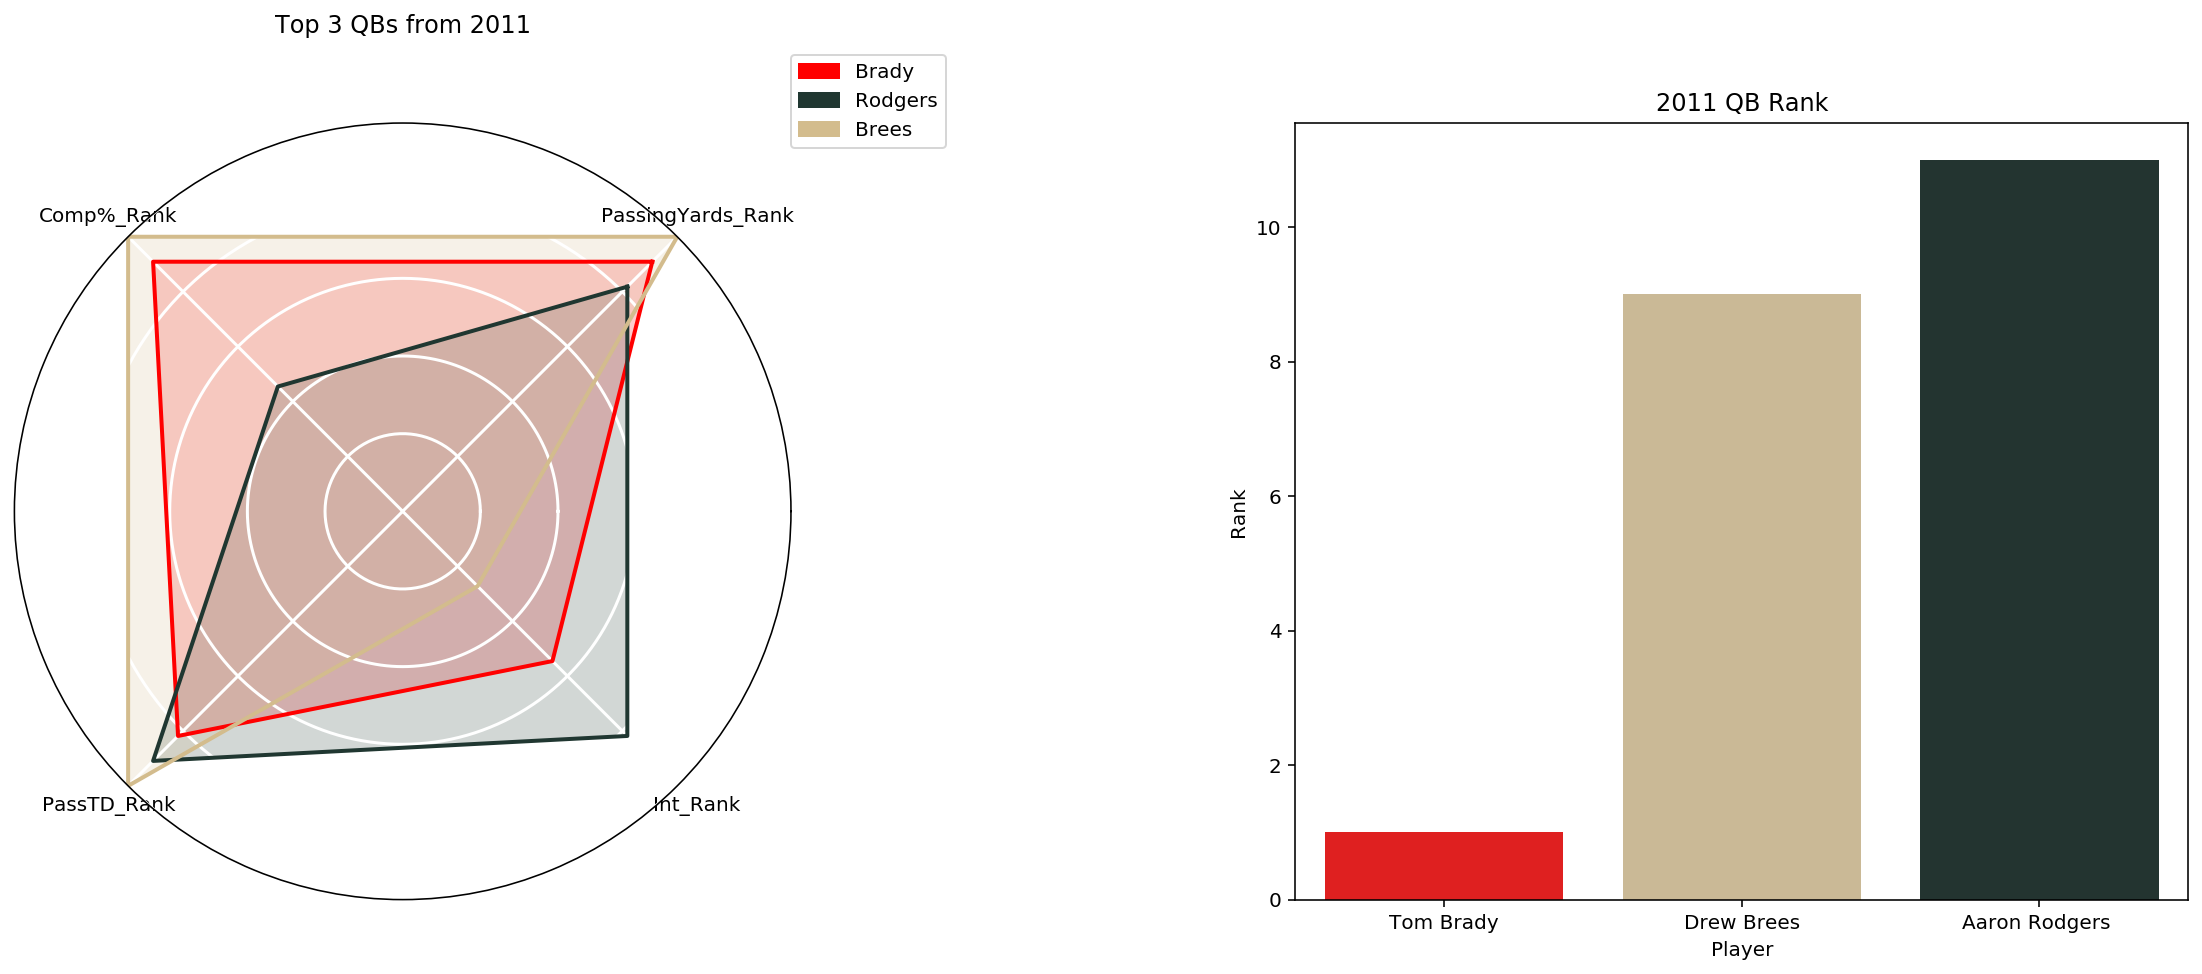

In [869]:
# 2011 QBS - Tom Brady, Drew Brees, Aaron Rdgers

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_2011 = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2011 = get_qb_data(qb_2011_df, 'NWE')
Rodgers_data_2011 = get_qb_data(qb_2011_df, 'GNB')
Brees_data_2011 = get_qb_data(qb_2011_df, 'NOR')

# Plot QB data
radar_chart(qb_2011, angles, Brady_data_2011, team_colors['NWE'])
radar_chart(qb_2011, angles, Rodgers_data_2011, team_colors['GNB'])
radar_chart(qb_2011, angles, Brees_data_2011, team_colors['NOR'])

# Title
qb_2011.set_title("Top 3 QBs from 2011", y=1.10)

# Legend
Brady = mpatches.Patch(color = team_colors['NWE'], label='Brady')
Rodgers = mpatches.Patch(color = team_colors['GNB'], label='Rodgers')
Brees = mpatches.Patch(color = team_colors['NOR'], label='Brees')
qb_2011.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady, Rodgers, Brees], loc='upper center')


# Create barchart subplot to show QB rankings from DF

# Create a separate df to pull players you are looking for
qb_2011_bar = fig.add_subplot(222)
sns.set_palette(sns.color_palette(team_colors.values()))
qb_2011_ranked_df = qb_2011_df[(qb_2011_df['Player'] == 'Tom Brady') | (qb_2011_df['Player'] == 'Drew Brees') | (qb_2011_df['Player'] == 'Aaron Rodgers ')]

# Using seaborn, plot bar graph
import seaborn as sns
sns.barplot(x="Player", y="Rank", data=qb_2011_ranked_df, palette = ['#FF0000', '#d3bc8d', '#203731']);

qb_2011_bar.set_title("2011 QB Rank")

plt.show()

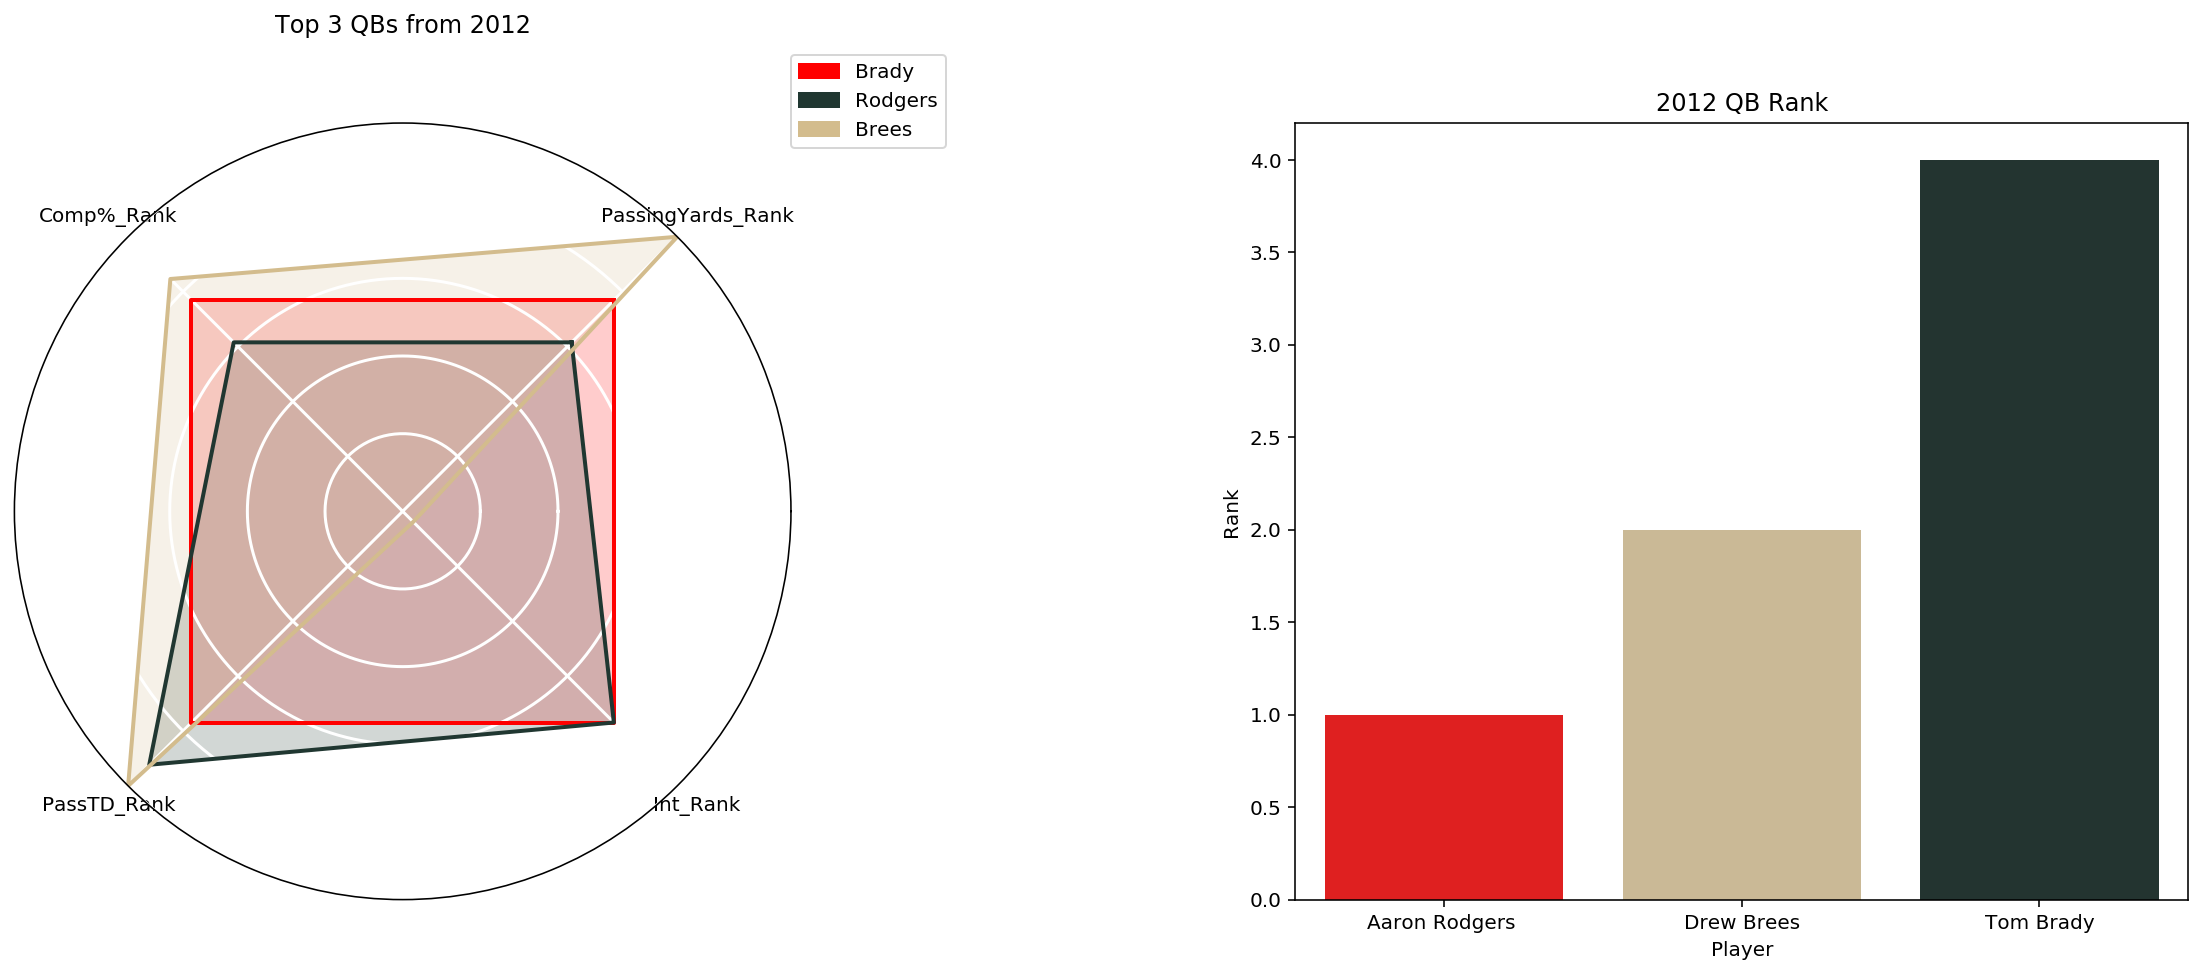

In [870]:
# 2012 QBS - Brady, Brees, Rogers

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_2012 = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2012 = get_qb_data(qb_2012_df, 'NWE')
Rodgers_data_2012 = get_qb_data(qb_2012_df, 'GNB')
Brees_data_2012 = get_qb_data(qb_2012_df, 'NOR')

# Plot QB data
radar_chart(qb_2012, angles, Brady_data_2012, team_colors['NWE'])
radar_chart(qb_2012, angles, Rodgers_data_2012, team_colors['GNB'])
radar_chart(qb_2012, angles, Brees_data_2012, team_colors['NOR'])

# Title
qb_2012.set_title("Top 3 QBs from 2012", y=1.10)

# Legend
Brady = mpatches.Patch(color = team_colors['NWE'], label='Brady')
Rodgers = mpatches.Patch(color = team_colors['GNB'], label='Rodgers')
Brees = mpatches.Patch(color = team_colors['NOR'], label='Brees')
qb_2012.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady, Rodgers, Brees], loc='upper center')

# Create barchart subplot to show QB rankings from DF

# Create a separate df to pull players you are looking for
qb_2012_bar = fig.add_subplot(222)
sns.set_palette(sns.color_palette(team_colors.values()))
qb_2012_ranked_df = qb_2012_df[(qb_2012_df['Player'] == 'Tom Brady') | (qb_2012_df['Player'] == 'Drew Brees') | 
                               (qb_2012_df['Player'] == 'Aaron Rodgers ')]
qb_2012_ranked_df.head()

# Using seaborn, plot bar graph
import seaborn as sns
sns.barplot(x="Player", y="Rank", data=qb_2012_ranked_df, palette = ['#FF0000', '#d3bc8d', '#203731']);

qb_2012_bar.set_title("2012 QB Rank")

plt.show()

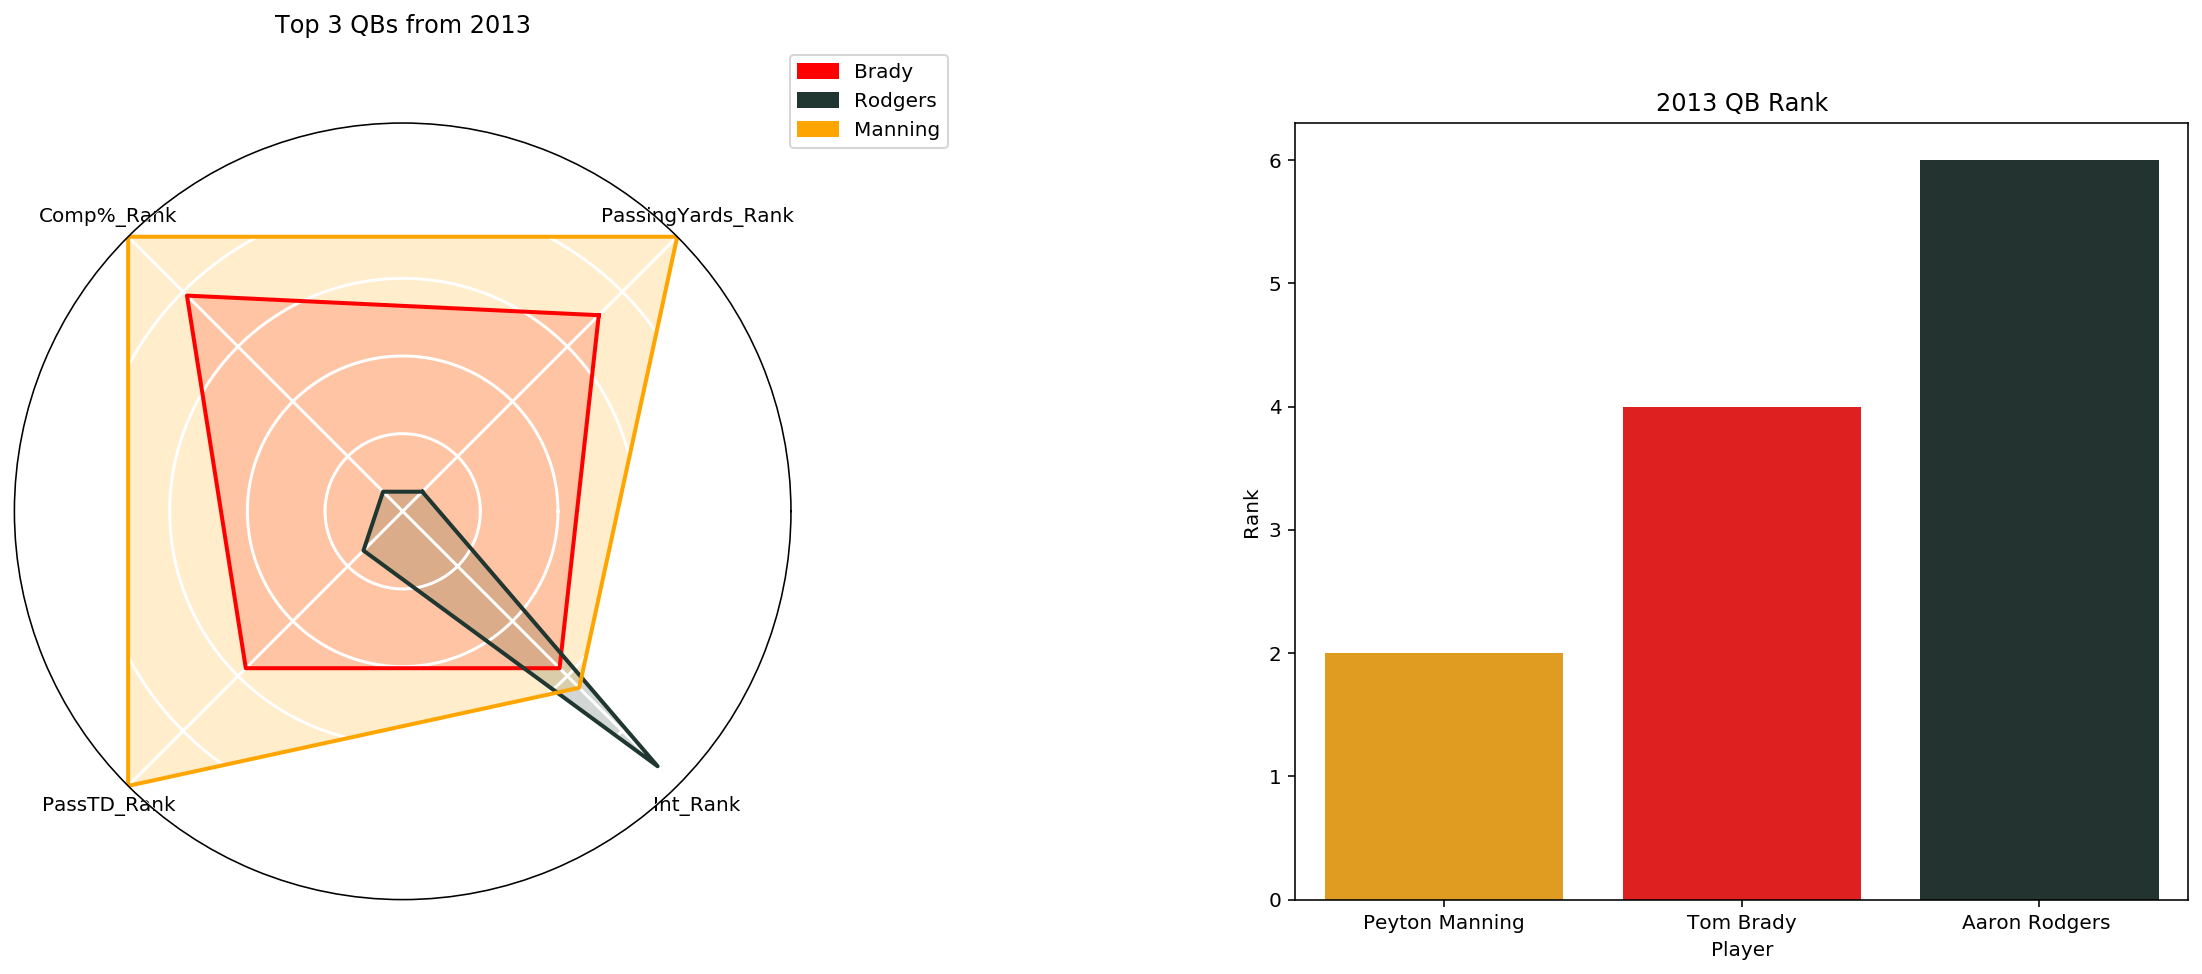

In [871]:
# 2013 QBS - Peyton Manning, Tom Brady, Aaron Rodgers

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_2013 = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2013 = get_qb_data(qb_2013_df, 'NWE')
Rodgers_data_2013 = get_qb_data(qb_2013_df, 'GNB')
Manning_data_2013 = get_qb_data(qb_2013_df, 'DEN')

# Plot QB data
radar_chart(qb_2013, angles, Brady_data_2013, team_colors['NWE'])
radar_chart(qb_2013, angles, Rodgers_data_2013, team_colors['GNB'])
radar_chart(qb_2013, angles, Manning_data_2013, team_colors['DEN'])

# Title
qb_2013.set_title("Top 3 QBs from 2013", y=1.10)

# Legend
Brady = mpatches.Patch(color = team_colors['NWE'], label='Brady')
Rodgers = mpatches.Patch(color = team_colors['GNB'], label='Rodgers')
Manning = mpatches.Patch(color = team_colors['DEN'], label='Manning')
qb_2013.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady, Rodgers, Manning], loc='upper center')

# Create barchart subplot to show QB rankings from DF
# Create a separate df to pull players you are looking for
qb_2013_bar = fig.add_subplot(222)
sns.set_palette(sns.color_palette(team_colors.values()))
qb_2013_ranked_df = qb_2013_df[(qb_2013_df['Player'] == 'Tom Brady') | (qb_2013_df['Player'] == 'Peyton Manning') | 
                               (qb_2013_df['Player'] == 'Aaron Rodgers ')]
qb_2013_ranked_df.head()

# Using seaborn, plot bar graph
import seaborn as sns
sns.barplot(x="Player", y="Rank", data=qb_2013_ranked_df, palette = ['#FFA500', '#FF0000', '#203731']);

qb_2013_bar.set_title("2013 QB Rank")

plt.show()

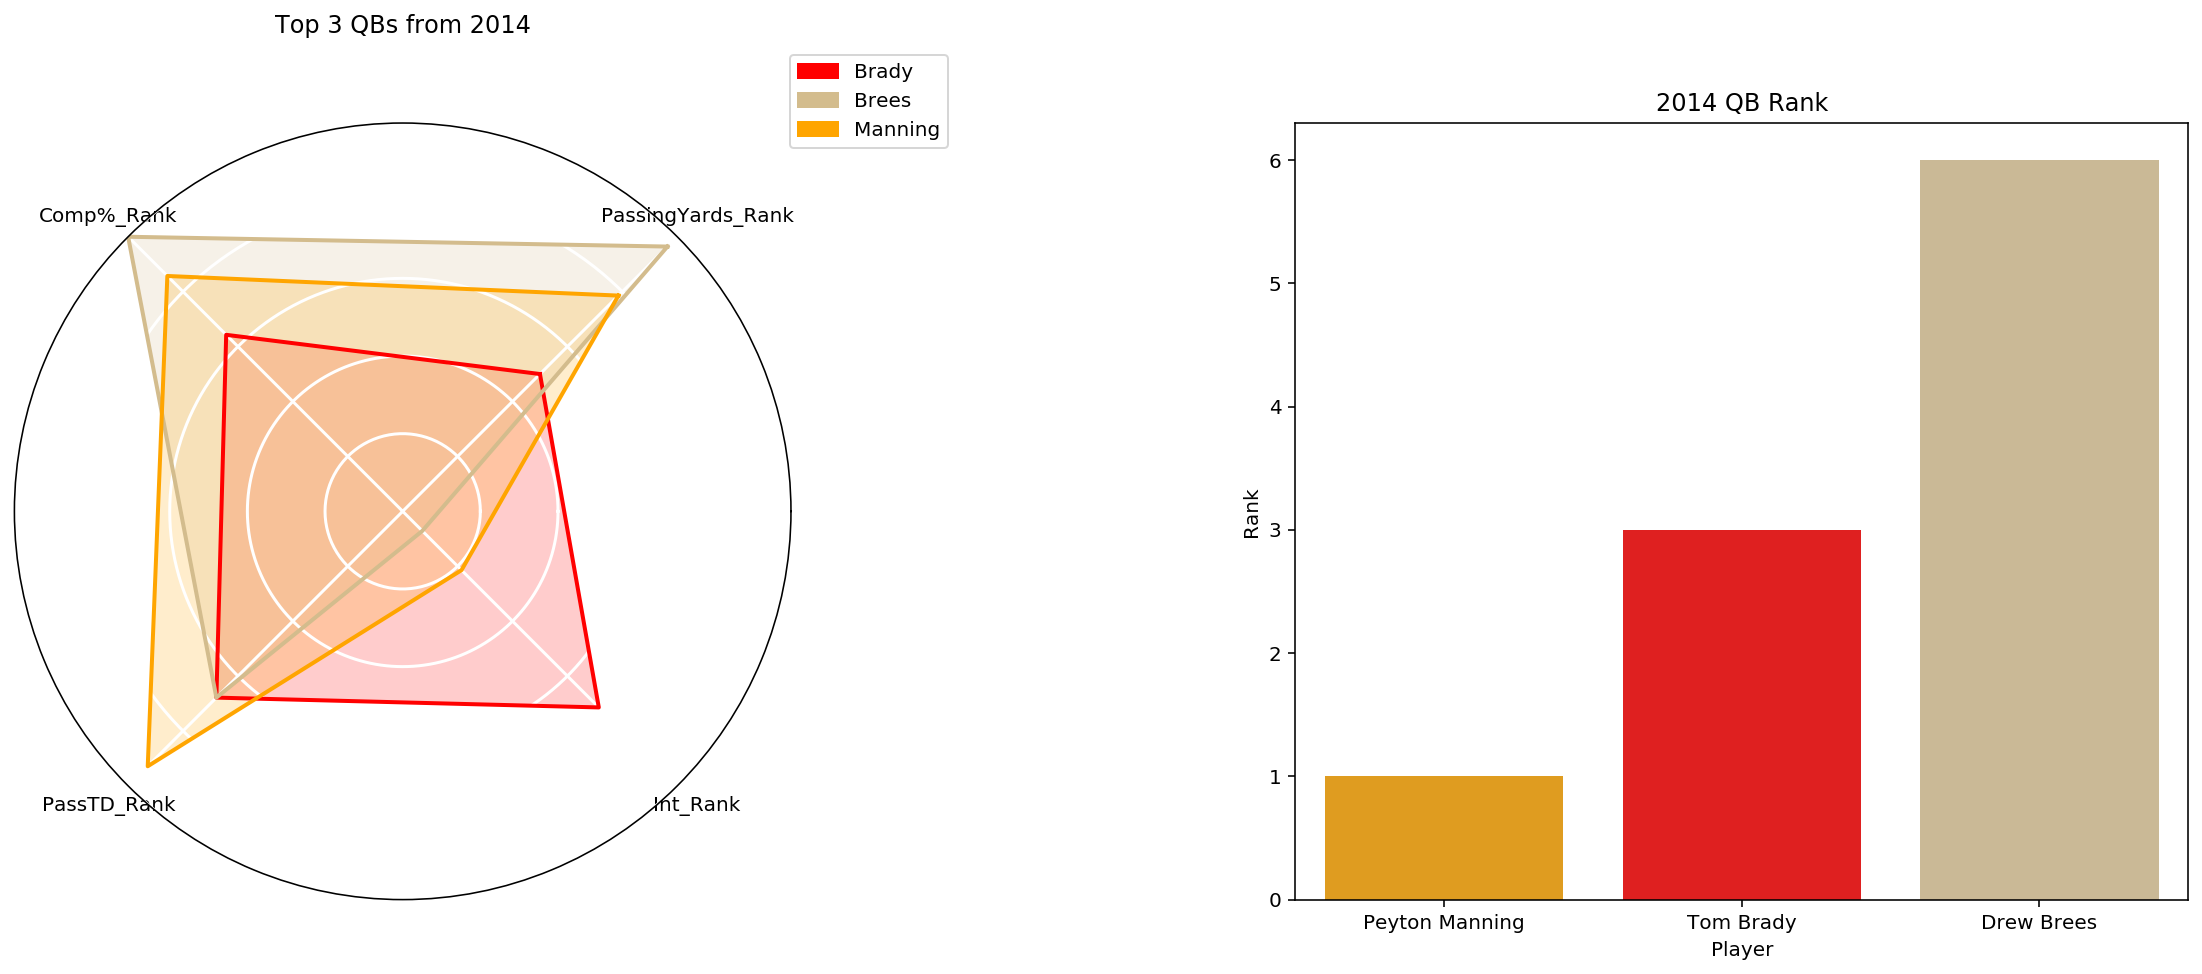

In [872]:
# 2014 QBS - Peyton Manning, Tom Brady, Drew Brees

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_2014 = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2014 = get_qb_data(qb_2014_df, 'NWE')
Brees_data_2014 = get_qb_data(qb_2014_df, 'NOR')
Manning_data_2014 = get_qb_data(qb_2014_df, 'DEN')

# Plot QB data
radar_chart(qb_2014, angles, Brady_data_2014, team_colors['NWE'])
radar_chart(qb_2014, angles, Brees_data_2014, team_colors['NOR'])
radar_chart(qb_2014, angles, Manning_data_2014, team_colors['DEN'])

# Title
qb_2014.set_title("Top 3 QBs from 2014", y=1.10)

# Legend
Brady = mpatches.Patch(color = team_colors['NWE'], label='Brady')
Brees = mpatches.Patch(color = team_colors['NOR'], label='Brees')
Manning = mpatches.Patch(color = team_colors['DEN'], label='Manning')
qb_2014.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady, Brees, Manning], loc='upper center')

# Create barchart subplot to show QB rankings from DF
# Create a separate df to pull players you are looking for
qb_2014_bar = fig.add_subplot(222)
sns.set_palette(sns.color_palette(team_colors.values()))
qb_2014_ranked_df = qb_2014_df[(qb_2014_df['Player'] == 'Tom Brady') | (qb_2014_df['Player'] == 'Peyton Manning') | 
                               (qb_2014_df['Player'] == 'Drew Brees')]
qb_2014_ranked_df.head()

# Using seaborn, plot bar graph
import seaborn as sns
sns.barplot(x="Player", y="Rank", data=qb_2014_ranked_df, palette = ['#FFA500', '#FF0000', '#d3bc8d']);

qb_2014_bar.set_title("2014 QB Rank")

plt.show()

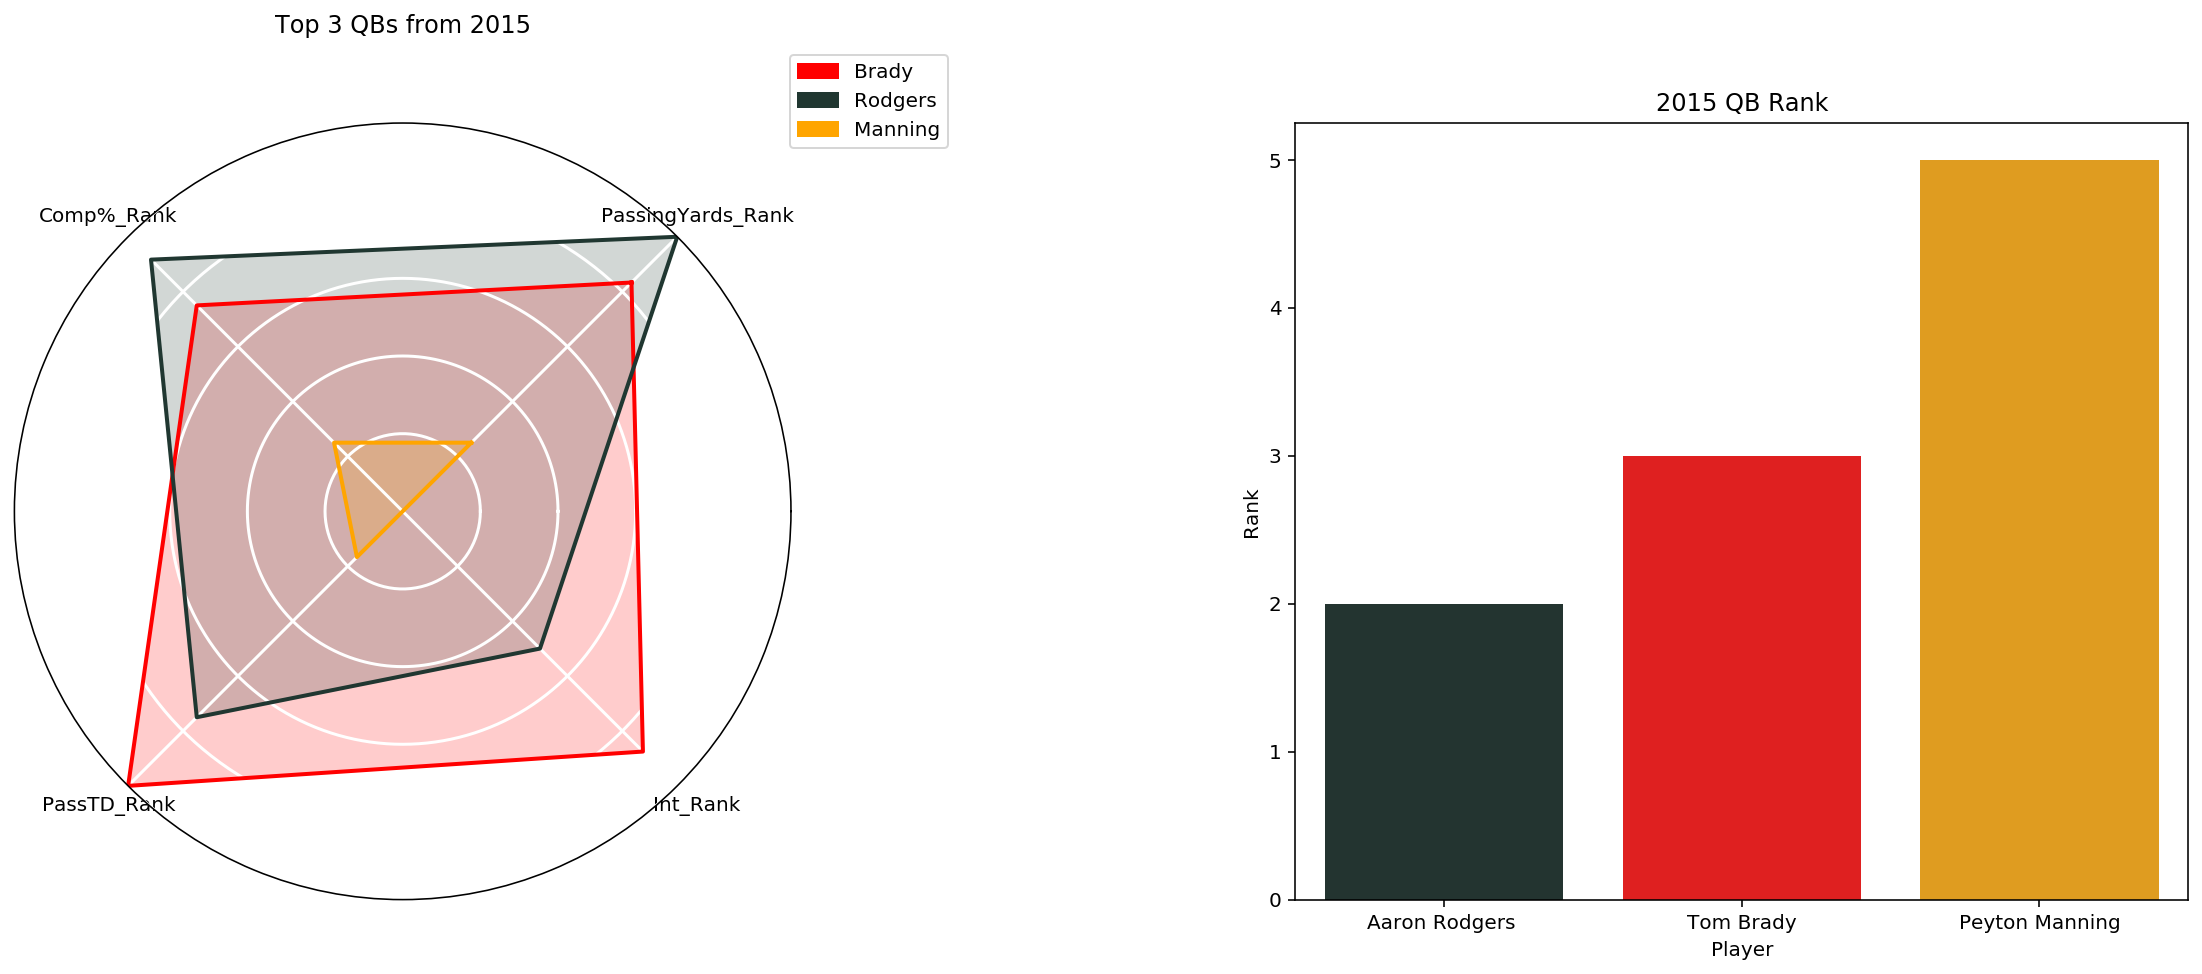

In [873]:
# 2015 QBS - Aaron Rodgers, Tom Brady, Peyton Manning

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_2015 = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2015 = get_qb_data(qb_2015_df, 'NWE')
Rodgers_data_2015 = get_qb_data(qb_2015_df, 'NOR')
Manning_data_2015 = get_qb_data(qb_2015_df, 'DEN')

# Plot QB data
radar_chart(qb_2015, angles, Brady_data_2015, team_colors['NWE'])
radar_chart(qb_2015, angles, Rodgers_data_2015, team_colors['GNB'])
radar_chart(qb_2015, angles, Manning_data_2015, team_colors['DEN'])

# Title
qb_2015.set_title("Top 3 QBs from 2015", y=1.10)

# Legend
Brady = mpatches.Patch(color = team_colors['NWE'], label='Brady')
Rodgers = mpatches.Patch(color = team_colors['GNB'], label='Rodgers')
Manning = mpatches.Patch(color = team_colors['DEN'], label='Manning')
qb_2015.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady, Rodgers, Manning], loc='upper center')

# Create barchart subplot to show QB rankings from DF
# Create a separate df to pull players you are looking for
qb_2015_bar = fig.add_subplot(222)
sns.set_palette(sns.color_palette(team_colors.values()))
qb_2015_ranked_df = qb_2015_df[(qb_2015_df['Player'] == 'Tom Brady') | (qb_2015_df['Player'] == 'Peyton Manning') | 
                               (qb_2015_df['Player'] == 'Aaron Rodgers ')]
qb_2015_ranked_df.head()

# Using seaborn, plot bar graph
import seaborn as sns
sns.barplot(x="Player", y="Rank", data=qb_2015_ranked_df, palette = ['#203731', '#FF0000', '#FFA500']);

qb_2015_bar.set_title("2015 QB Rank")

plt.show()

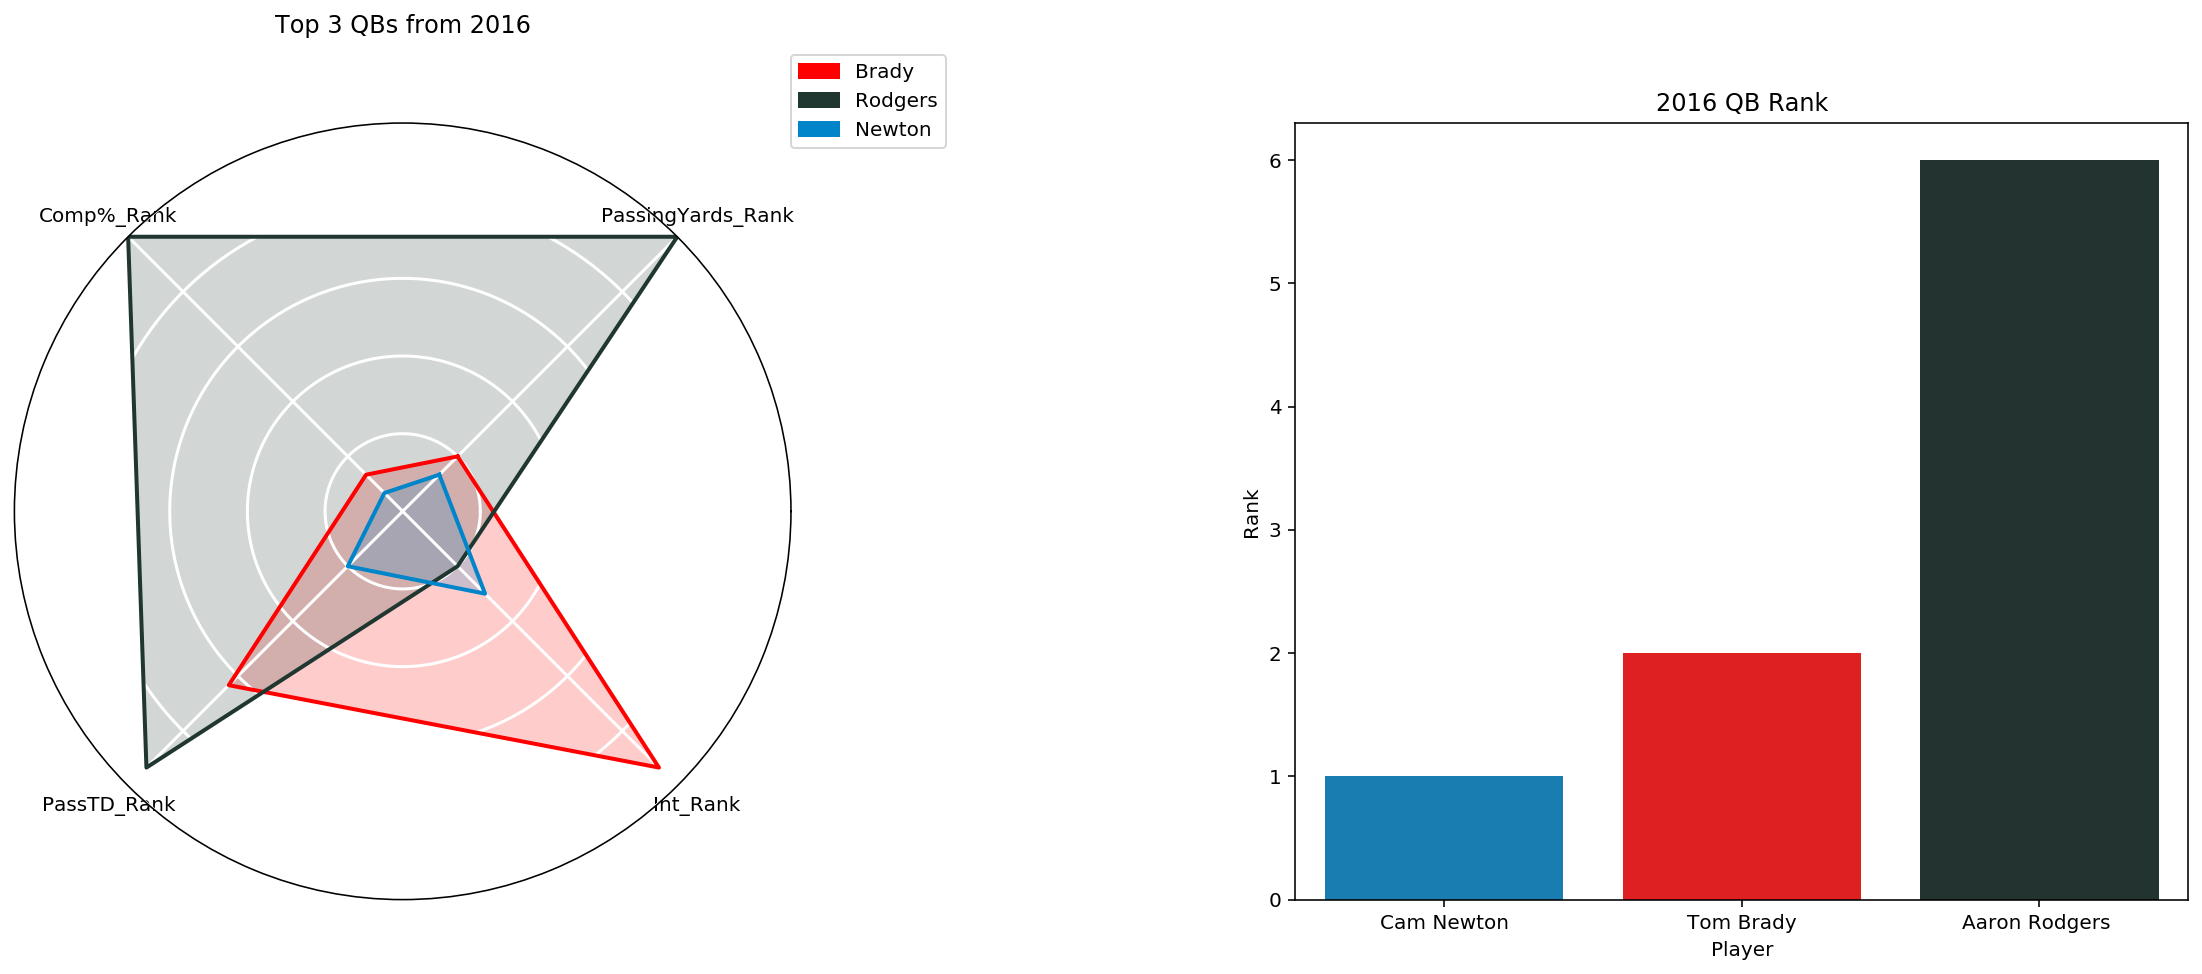

In [874]:
# 2016 QBS - Cam Newton, Tom Brady, Aaron Rodgers

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_2016 = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2016 = get_qb_data(qb_2016_df, 'NWE')
Rodgers_data_2016 = get_qb_data(qb_2016_df, 'NOR')
Newton_data_2016 = get_qb_data(qb_2016_df, 'CAR')

# Plot QB data
radar_chart(qb_2016, angles, Brady_data_2016, team_colors['NWE'])
radar_chart(qb_2016, angles, Rodgers_data_2016, team_colors['GNB'])
radar_chart(qb_2016, angles, Newton_data_2016, team_colors['CAR'])

# Title
qb_2016.set_title("Top 3 QBs from 2016", y=1.10)

# Legend
Brady = mpatches.Patch(color = team_colors['NWE'], label='Brady')
Rodgers = mpatches.Patch(color = team_colors['GNB'], label='Rodgers')
Newton = mpatches.Patch(color = team_colors['CAR'], label='Newton')
qb_2016.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady, Rodgers, Newton], loc='upper center')

# Create barchart subplot to show QB rankings from DF
# Create a separate df to pull players you are looking for
qb_2016_bar = fig.add_subplot(222)
sns.set_palette(sns.color_palette(team_colors.values()))
qb_2016_ranked_df = qb_2016_df[(qb_2016_df['Player'] == 'Tom Brady') | (qb_2016_df['Player'] == 'Cam Newton') | 
                               (qb_2016_df['Player'] == 'Aaron Rodgers ')]
qb_2016_ranked_df.head()

# Using seaborn, plot bar graph
import seaborn as sns
sns.barplot(x="Player", y="Rank", data=qb_2016_ranked_df, palette = ['#0085ca', '#FF0000', '#203731']);

qb_2016_bar.set_title("2016 QB Rank")

plt.show()

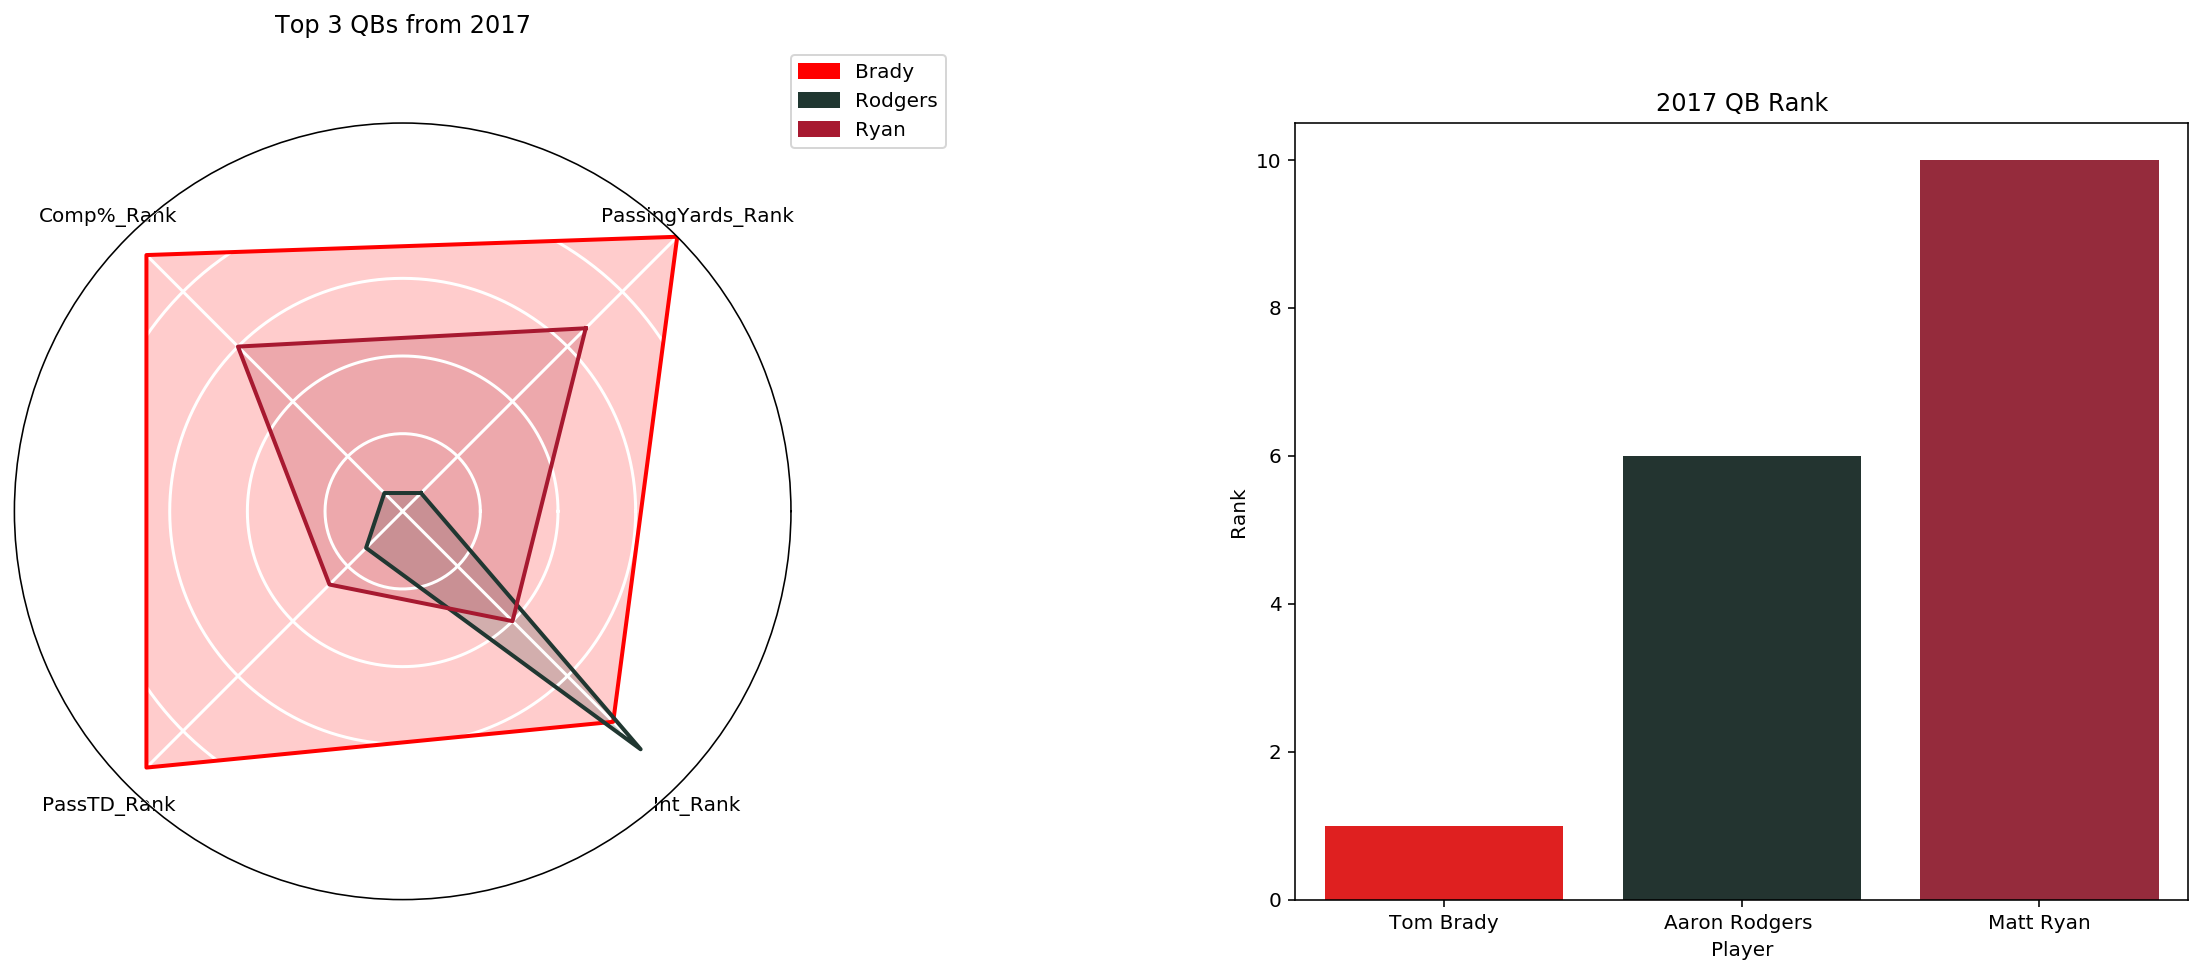

In [875]:
# 2017 QBS - Tom Brady, Aaron Rodgers, Matt Ryan

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_2017 = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2017 = get_qb_data(qb_2017_df, 'NWE')
Rodgers_data_2017 = get_qb_data(qb_2017_df, 'GNB')
Ryan_data_2017 = get_qb_data(qb_2017_df, 'ATL')

# Plot QB data
radar_chart(qb_2017, angles, Brady_data_2017, team_colors['NWE'])
radar_chart(qb_2017, angles, Rodgers_data_2017, team_colors['GNB'])
radar_chart(qb_2017, angles, Ryan_data_2017, team_colors['ATL'])

# Title
qb_2017.set_title("Top 3 QBs from 2017", y=1.10)

# Legend
Brady = mpatches.Patch(color = team_colors['NWE'], label='Brady')
Rodgers = mpatches.Patch(color = team_colors['GNB'], label='Rodgers')
Ryan = mpatches.Patch(color = team_colors['ATL'], label='Ryan')
qb_2017.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady, Rodgers, Ryan], loc='upper center')

# Create barchart subplot to show QB rankings from DF
# Create a separate df to pull players you are looking for
qb_2017_bar = fig.add_subplot(222)
sns.set_palette(sns.color_palette(team_colors.values()))
qb_2017_ranked_df = qb_2017_df[(qb_2017_df['Player'] == 'Tom Brady') | (qb_2017_df['Player'] == 'Matt Ryan') | 
                               (qb_2017_df['Player'] == 'Aaron Rodgers ')]
qb_2017_ranked_df.head()

# Using seaborn, plot bar graph
import seaborn as sns
sns.barplot(x="Player", y="Rank", data=qb_2017_ranked_df, palette = ['#FF0000', '#203731', '#a71930']);

qb_2017_bar.set_title("2017 QB Rank")

plt.show()

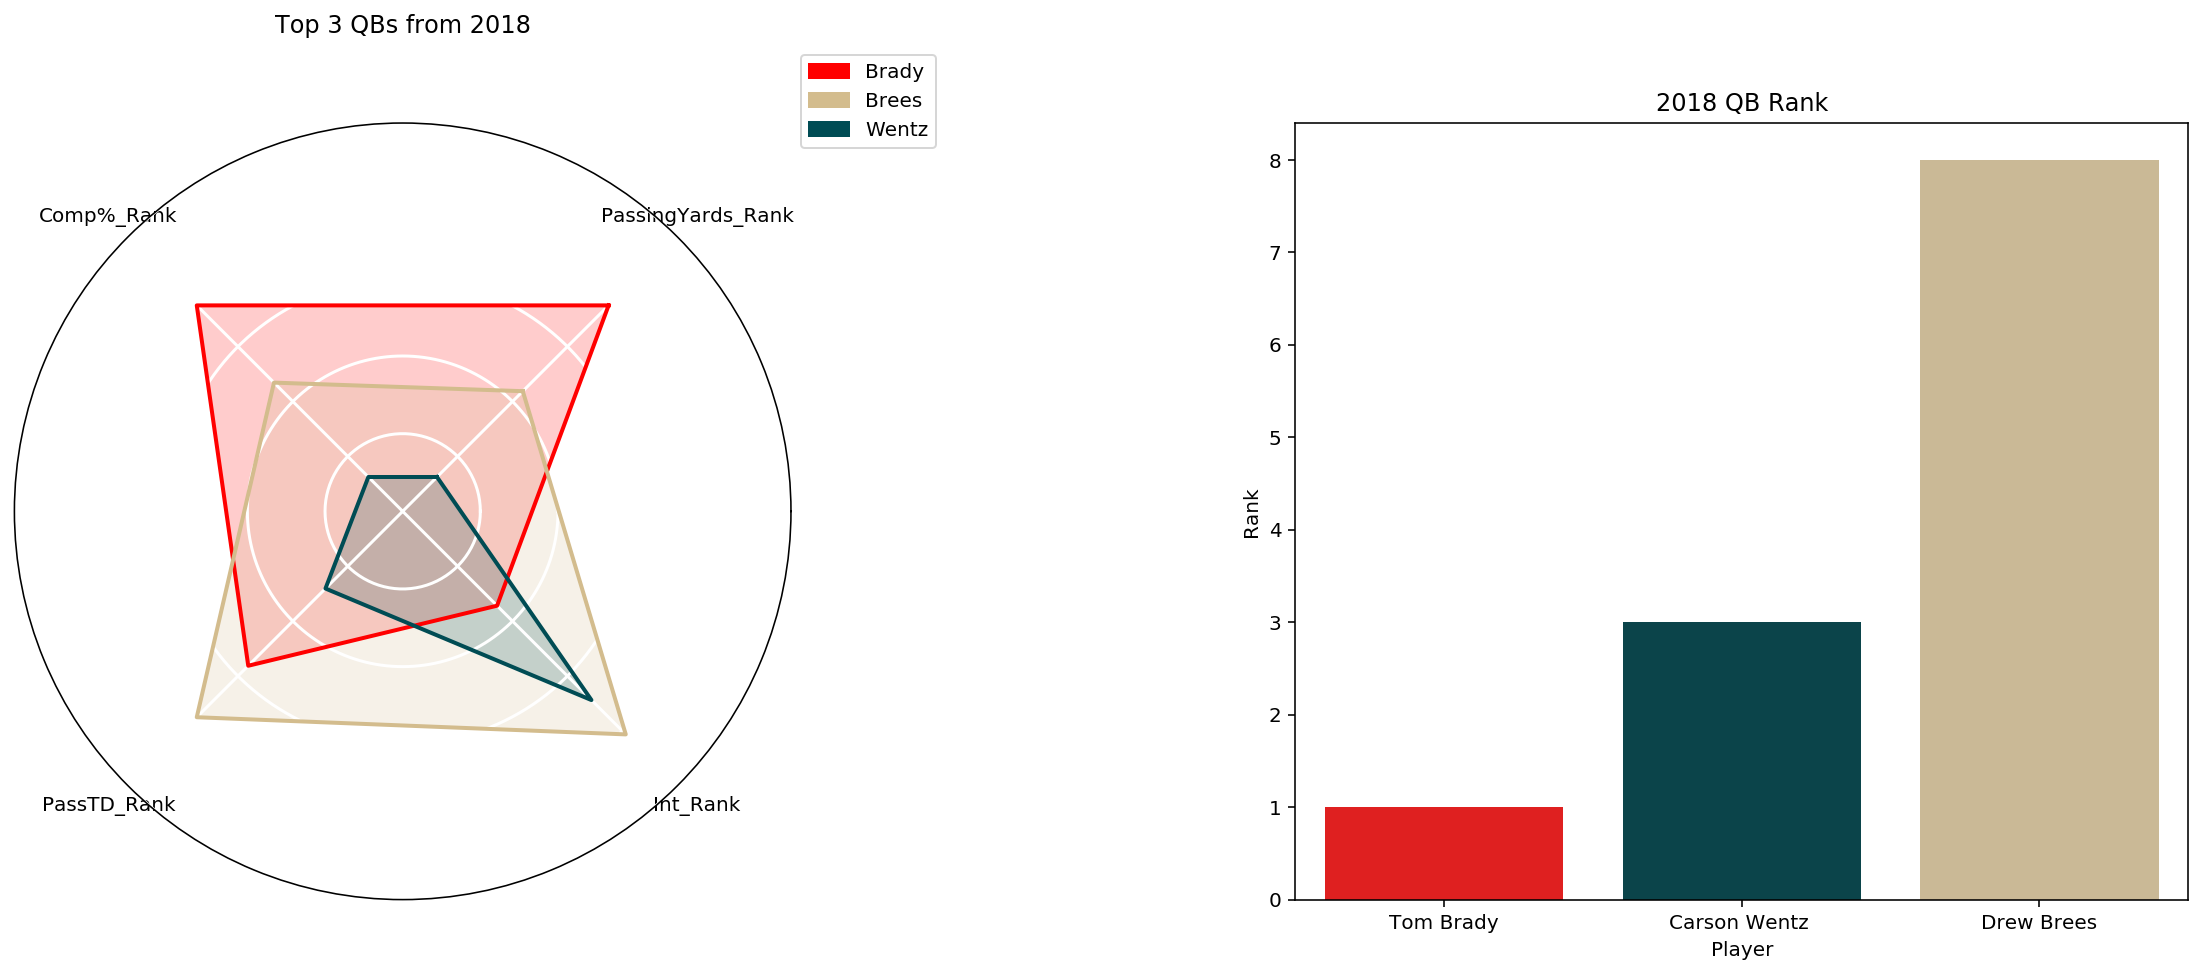

In [876]:
# 2018 QBS - Tom Brady, Carson Wentz, Drew Brees

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_2018 = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2018 = get_qb_data(qb_2018_df, 'NWE')
Brees_data_2018 = get_qb_data(qb_2018_df, 'NOR')
Wentz_data_2018 = get_qb_data(qb_2018_df, 'PHI')

# Plot QB data
radar_chart(qb_2018, angles, Brady_data_2018, team_colors['NWE'])
radar_chart(qb_2018, angles, Brees_data_2018, team_colors['NOR'])
radar_chart(qb_2018, angles, Wentz_data_2018, team_colors['PHI'])

# Title
qb_2018.set_title("Top 3 QBs from 2018", y=1.10)

# Legend
Brady = mpatches.Patch(color = team_colors['NWE'], label='Brady')
Brees = mpatches.Patch(color = team_colors['NOR'], label='Brees')
Wentz = mpatches.Patch(color = team_colors['PHI'], label='Wentz')
qb_2018.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady, Brees, Wentz], loc='upper center')

# Create barchart subplot to show QB rankings from DF
# Create a separate df to pull players you are looking for
qb_2018_bar = fig.add_subplot(222)
sns.set_palette(sns.color_palette(team_colors.values()))
qb_2018_ranked_df = qb_2018_df[(qb_2018_df['Player'] == 'Tom Brady') | (qb_2018_df['Player'] == 'Drew Brees') | 
                               (qb_2018_df['Player'] == 'Carson Wentz ')]
qb_2018_ranked_df.head()

# Using seaborn, plot bar graph
import seaborn as sns
sns.barplot(x="Player", y="Rank", data=qb_2018_ranked_df, palette = ['#FF0000', '#004c54', '#d3bc8d']);

qb_2018_bar.set_title("2018 QB Rank")

plt.show()

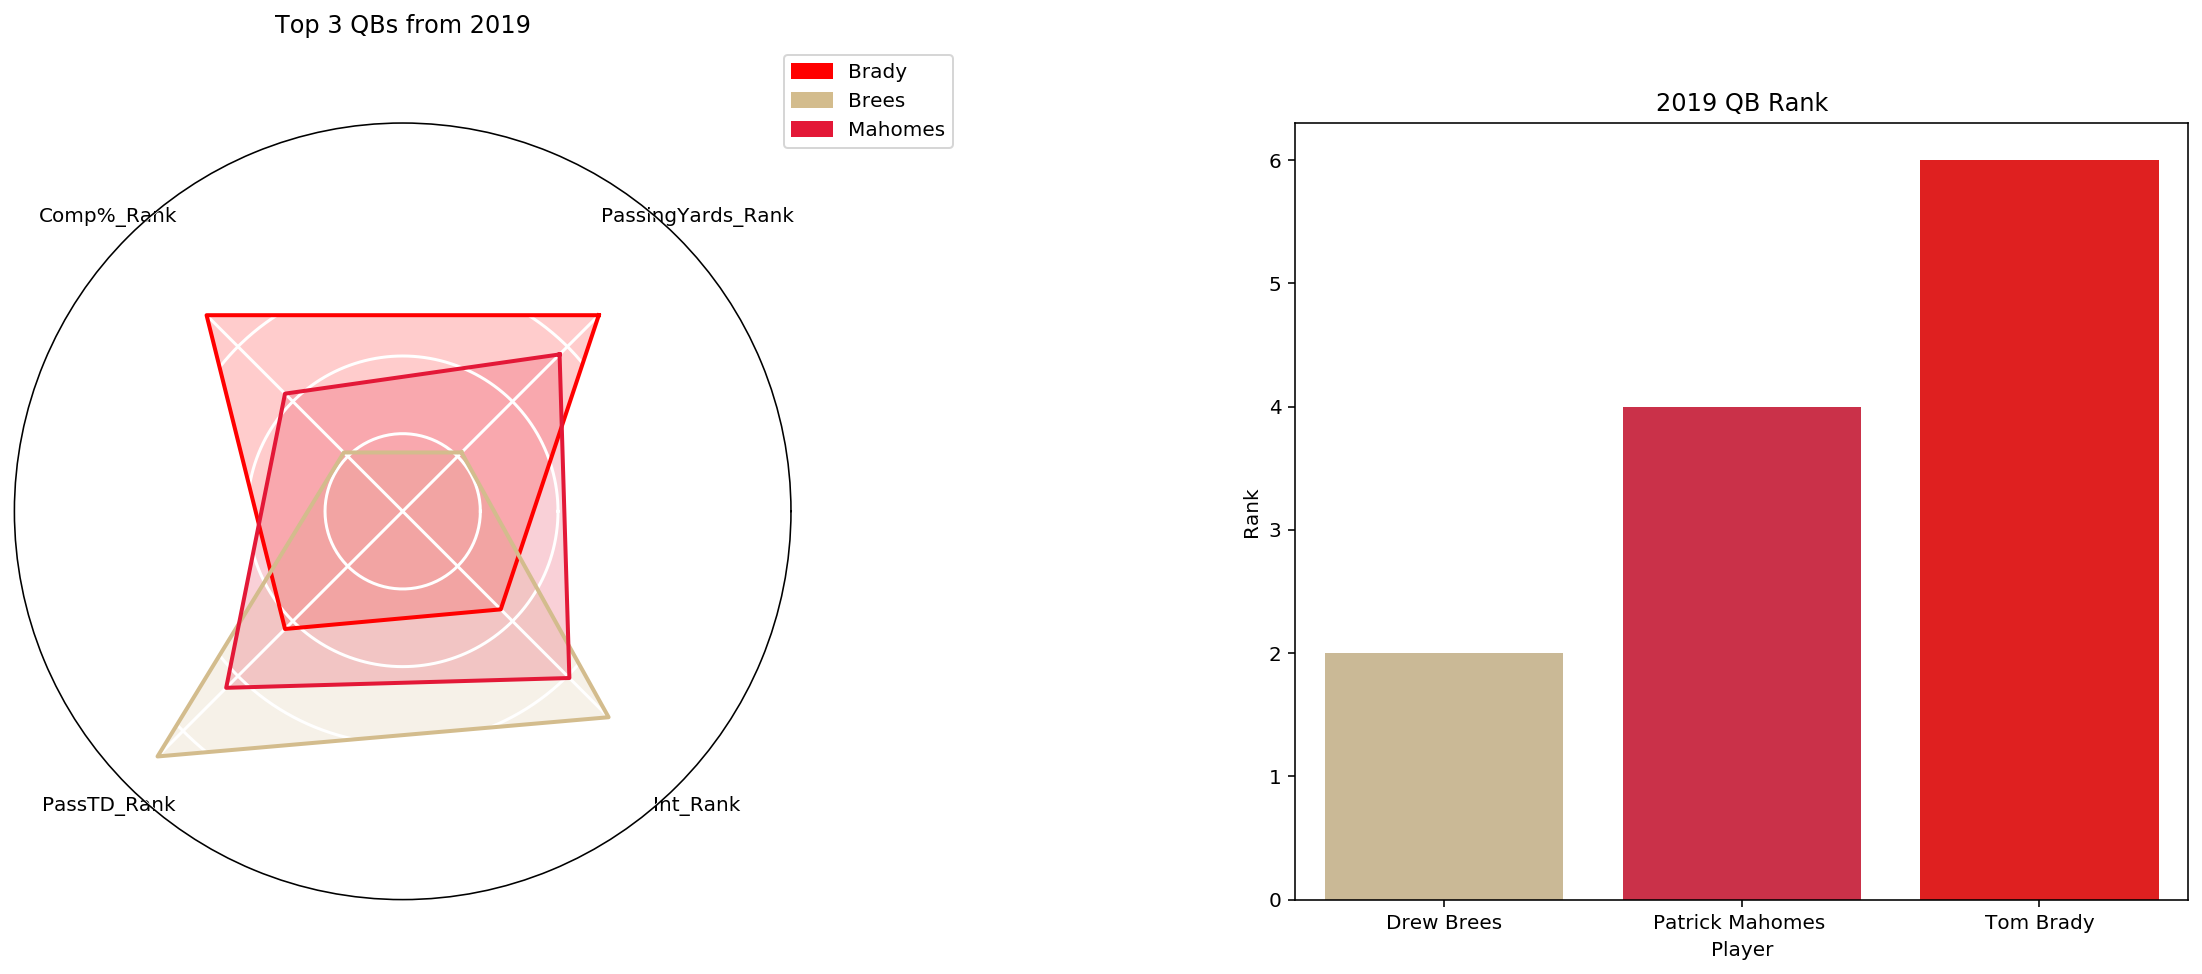

In [877]:
# 2019 QBS - Drew Brees, Patrick Mahomes, Tom Brady

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_2019 = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2019 = get_qb_data(qb_2019_df, 'NWE')
Brees_data_2019 = get_qb_data(qb_2019_df, 'NOR')
Mahomes_data_2019 = get_qb_data(qb_2019_df, 'KAN')

# Plot QB data
radar_chart(qb_2019, angles, Brady_data_2019, team_colors['NWE'])
radar_chart(qb_2019, angles, Brees_data_2019, team_colors['NOR'])
radar_chart(qb_2019, angles, Mahomes_data_2019, team_colors['KAN'])

# Title
qb_2019.set_title("Top 3 QBs from 2019", y=1.10)

# Legend
Brady = mpatches.Patch(color = team_colors['NWE'], label='Brady')
Brees = mpatches.Patch(color = team_colors['NOR'], label='Brees')
Mahomes = mpatches.Patch(color = team_colors['KAN'], label='Mahomes')
qb_2019.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady, Brees, Mahomes], loc='upper center')

# Create barchart subplot to show QB rankings from DF
# Create a separate df to pull players you are looking for
qb_2019_bar = fig.add_subplot(222)
sns.set_palette(sns.color_palette(team_colors.values()))
qb_2019_ranked_df = qb_2019_df[(qb_2019_df['Player'] == 'Tom Brady') | (qb_2019_df['Player'] == 'Drew Brees') | 
                               (qb_2019_df['Player'] == 'Patrick Mahomes ')]
qb_2019_ranked_df.head()

# Using seaborn, plot bar graph
import seaborn as sns
sns.barplot(x="Player", y="Rank", data=qb_2019_ranked_df, palette = ['#d3bc8d', '#e31837', '#FF0000']);

qb_2019_bar.set_title("2019 QB Rank")

plt.show()

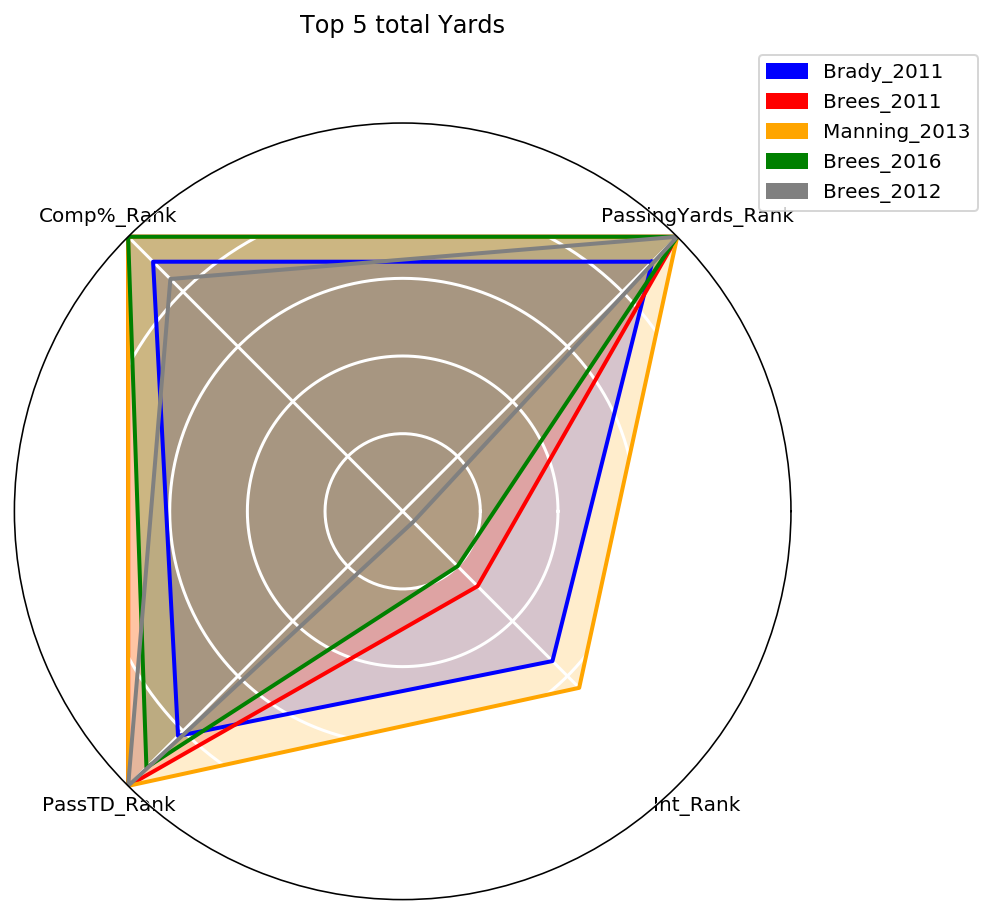

In [878]:
# Plot the top 5 passing yards all years
# Manning - 2013, Brees - 2011, Brady - 2011, Brees - 2016, Brees - 2012

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_passing_yards = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brady_data_2011 = get_qb_data(qb_2011_df, 'NWE')
Brees_data_2011 = get_qb_data(qb_2011_df, 'NOR')
Manning_data_2013 = get_qb_data(qb_2013_df, 'DEN')
Brees_data_2016 = get_qb_data(qb_2016_df, 'NOR')
Brees_data_2012 = get_qb_data(qb_2012_df, 'NOR')


# Plot QB data
radar_chart(qb_passing_yards, angles, Brady_data_2011, color = 'blue')
radar_chart(qb_passing_yards, angles, Brees_data_2011, color = 'red')
radar_chart(qb_passing_yards, angles, Manning_data_2013, color = 'orange')
radar_chart(qb_passing_yards, angles, Brees_data_2016, color = 'green')
radar_chart(qb_passing_yards, angles, Brees_data_2012, color = 'grey')

# Title
qb_passing_yards.set_title("Top 5 total Yards", y=1.10)

# Legend
Brady_2011 = mpatches.Patch(color = 'blue', label='Brady_2011')
Brees_2011 = mpatches.Patch(color = 'red', label='Brees_2011')
Manning_2013 = mpatches.Patch(color = 'orange', label='Manning_2013')
Brees_2016 = mpatches.Patch(color = 'green', label='Brees_2016')
Brees_2012 = mpatches.Patch(color = 'grey', label='Brees_2012')

qb_passing_yards.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brady_2011, Brees_2011, Manning_2013, Brees_2016, 
                                                              Brees_2012], loc='upper center')


plt.show()

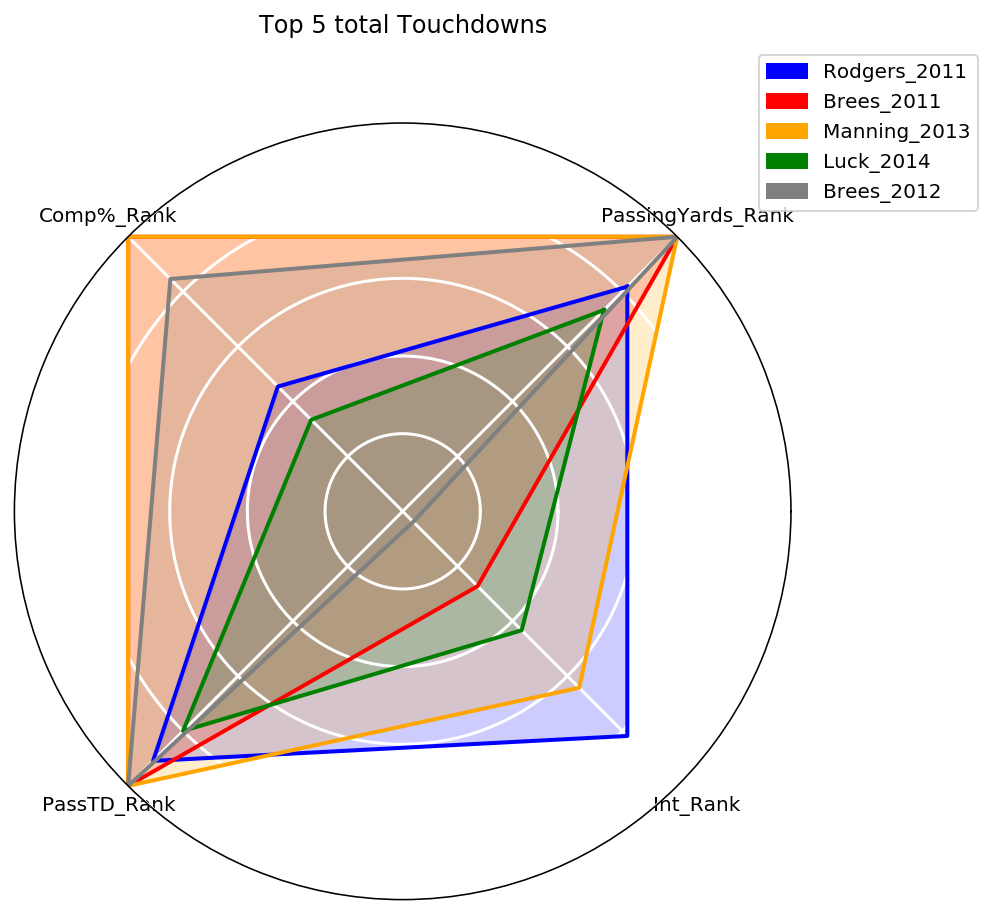

In [879]:
# Plot the top 5 TDs all years
# Manning - 2013, Brees - 2011, Rodgers - 2011, Brees - 2012, Luck - 2014

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_passing_td = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Rodgers_data_2011 = get_qb_data(qb_2011_df, 'GNB')
Brees_data_2011 = get_qb_data(qb_2011_df, 'NOR')
Manning_data_2013 = get_qb_data(qb_2013_df, 'DEN')
Luck_data_2014 = get_qb_data(qb_2016_df, 'IND')
Brees_data_2012 = get_qb_data(qb_2012_df, 'NOR')


# Plot QB data
radar_chart(qb_passing_td, angles, Rodgers_data_2011, color = 'blue')
radar_chart(qb_passing_td, angles, Brees_data_2011, color = 'red')
radar_chart(qb_passing_td, angles, Manning_data_2013, color = 'orange')
radar_chart(qb_passing_td, angles, Luck_data_2014, color = 'green')
radar_chart(qb_passing_td, angles, Brees_data_2012, color = 'grey')

# Title
qb_passing_td.set_title("Top 5 total Touchdowns", y=1.10)

# Legend
Rodgers_2011 = mpatches.Patch(color = 'blue', label='Rodgers_2011')
Brees_2011 = mpatches.Patch(color = 'red', label='Brees_2011')
Manning_2013 = mpatches.Patch(color = 'orange', label='Manning_2013')
Luck_2014 = mpatches.Patch(color = 'green', label='Luck_2014')
Brees_2012 = mpatches.Patch(color = 'grey', label='Brees_2012')

qb_passing_td.legend(bbox_to_anchor=(1.10, 1.10), handles=[Rodgers_2011, Brees_2011, Manning_2013, Luck_2014, Brees_2012], loc='upper center')

plt.show()

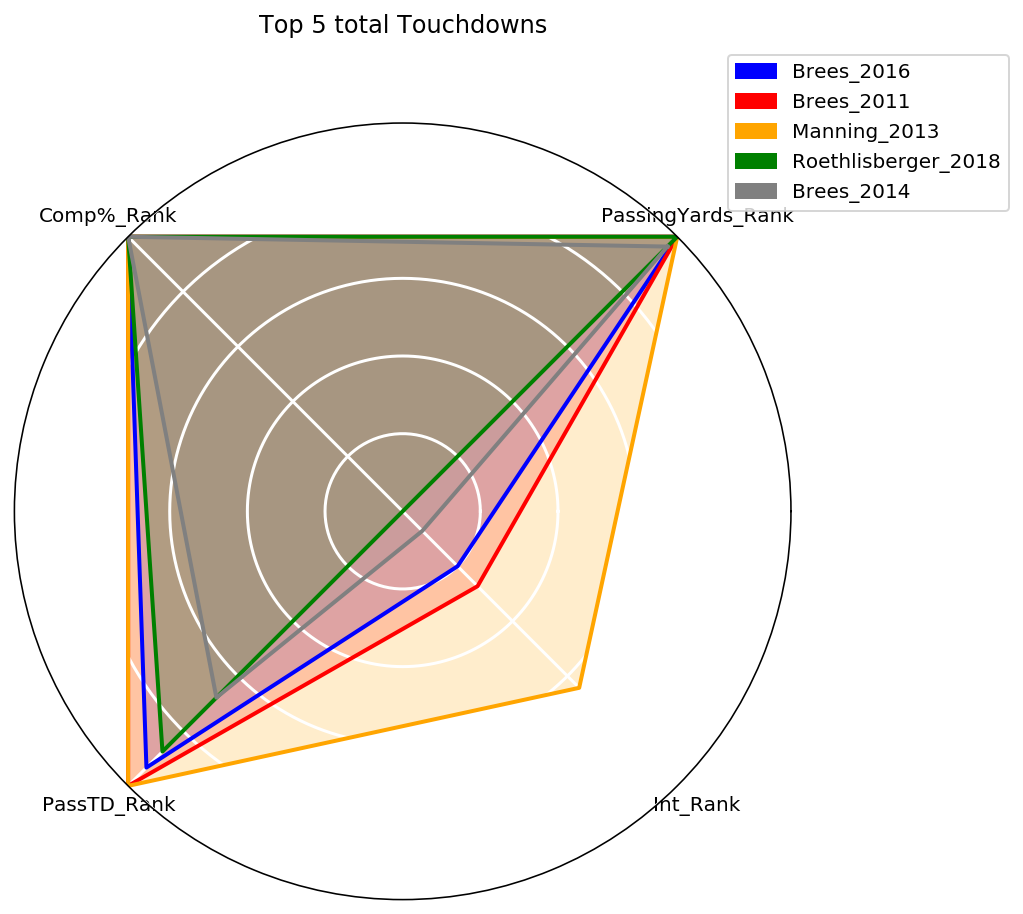

In [880]:
# Plot the top Completion % all years
# Brees - 2016, Brees - 2011, Brees - 2014, Roethlisberger - 2018, Manning - 2013

# Create figure
fig = plt.figure(figsize=(20, 20), facecolor='white')

# Add subplots
qb_comp = fig.add_subplot(221, projection='polar', facecolor='#FFFFFF')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
Brees_data_2016 = get_qb_data(qb_2016_df, 'NOR')
Brees_data_2011 = get_qb_data(qb_2011_df, 'NOR')
Manning_data_2013 = get_qb_data(qb_2013_df, 'DEN')
Roethlisberger_data_2018 = get_qb_data(qb_2018_df, 'PIT')
Brees_data_2014 = get_qb_data(qb_2014_df, 'NOR')


# Plot QB data
radar_chart(qb_comp, angles, Brees_data_2016, color = 'blue')
radar_chart(qb_comp, angles, Brees_data_2011, color = 'red')
radar_chart(qb_comp, angles, Manning_data_2013, color = 'orange')
radar_chart(qb_comp, angles, Roethlisberger_data_2018, color = 'green')
radar_chart(qb_comp, angles, Brees_data_2014, color = 'grey')

# Title
qb_comp.set_title("Top 5 total Touchdowns", y=1.10)

# Legend
Brees_2016 = mpatches.Patch(color = 'blue', label='Brees_2016')
Brees_2011 = mpatches.Patch(color = 'red', label='Brees_2011')
Manning_2013 = mpatches.Patch(color = 'orange', label='Manning_2013')
Roethlisberger_2018 = mpatches.Patch(color = 'green', label='Roethlisberger_2018')
Brees_2014 = mpatches.Patch(color = 'grey', label='Brees_2014')

qb_comp.legend(bbox_to_anchor=(1.10, 1.10), handles=[Brees_2016, Brees_2011, Manning_2013, Roethlisberger_2018, Brees_2014], loc='upper center')

plt.show()